# Group 5 - Predicting a Country's S&P rating


#### <B>Note</B>

> Before Runing the code please make sure you have these libraries in your local environment. There are some codes which provides huge number of outputs. Hence it is recommended to run on local environment not on google colab  

- pandas 
- numpy
- matplotlib
- seaborn
- csv
- time
- plotly
- sklearn
- statsmodels


# Table of Content 
1. Discription
2. Data Understanding 
3. Problem faced and solution approch
4. Web Scraping
5. Data Preprocessing 
6. Model Building
    - Bayes Classification
    - Time series AR model
7. Result 
8. Interpretation section
9. Refrences

## 1. Discription

### What is S&P Rating 
- S&P Global Ratings is an American credit rating agency and a division of S&P Global that publishes financial research and analysis on stocks, bonds, and commodities. S&P is considered the largest of the Big Three credit-rating agencies, which also include Moody's Investors Service and Fitch Ratings



## 2. Data Understanding

#### Attribute 1 - Rating 

| Rating | Type | - |
| --- | --- | --- |
| AAA| Investment | Extremely strong    |
| AA+, AA, AA-  | Investment | Very Strong  |
| BBB+, BBB, BBB-  | Investment | Strong  |
| BB+, BB, BB-  | Speculative | Adequate  |
| B+, B, B-  | Speculative | Faces major future uncertainties  |
| CCC | Speculative | Currently vulnerable  |
| CC | Speculative | Currently highly vulnerable   |
| C | Speculative | Has filed bankruptcy petition   |
| D | Speculative | In defaulf  |





| Rating | Numeric Rating | Type |
| ---- | ---- | ---- |
| AAA | 22 | Top Notch for investement  |
| AA+ | 21 | Invest UNDER OBSERVATION  |
| AA | 20 | Invest UNDER OBSERVATION  |
| AA- | 19 | Invest UNDER OBSERVATION  |
| A+ | 18 | Invest UNDER OBSERVATION  |
| A | 17 | Invest UNDER OBSERVATION  |
| A- | 16 | Invest UNDER OBSERVATION  |
| BBB+ | 15 | Invest UNDER OBSERVATION  |
| BBB | 14 | Invest UNDER OBSERVATION  |
| BBB- | 13 | Invest UNDER OBSERVATION  |
| BB+ | 12 | Bad for investment  |
| BB | 11 | Bad for investment  |
| BB- | 10 | Bad for investment  |
| B+ | 9 | Bad for investment  |
| B | 8 | Bad for investment  |
| B- | 7 | Bad for investment  |
| CCC+ | 6 | Bad for investment  |
| CCC | 5 | Bad for investment  |
| CCC- | 4 | Bad for investment  |
| CC | 3 | Bad for investment  |
| C | 2 | Bad for investment |
| D | 1 | Bad for investment  |


#### Attribute 2 - Outlook

| Outlook type | Interpretation | 
| ----- | ----- |
| Positive | rating may be raised next month  | 
| Negative | rating may be lowered next month | 
| Stable | rating is not likely to change  | 


#### Attribute 3 - Date
- This attribute specify the date at which rating is catlulated



#### Example 

-  For any country with rating BBB in 2009 means, that particular country will repay the debt has a chance of 0.55% 

| Year |   AAA  |    AA  |    A |     BBB |     BB |     B  |    CCC/C |
| --- | --- | --- | --- | --- | --- | --- | --- | 
|2009  |    0.00  |  0.00  |  0.22  |  0.55  |  0.75  |  11.01  |  49.46 |
|2010  |   0.00   | 0.00  |  0.00  |  0.00  |  0.58  |  0.87   | 22.73 |
|2011  |  0.00   | 0.00  |  0.00  |  0.07  |  0.00  |  1.68   | 16.42 |
|2012  |  0.00   | 0.00  |  0.00  |  0.00  |  0.30  |  1.58   | 27.52 |
|2013  |  0.00   | 0.00  |  0.00  |  0.00  |  0.10  |  1.65   | 24.67 |
|2014  |  0.00   | 0.00  |  0.00  |  0.00  |  0.00  |  0.78   | 17.51 |
|2015  |  0.00   | 0.00  |  0.00  |  0.00  |  0.16  |  2.41   | 26.67 |
|2016  |  0.00   | 0.00  |  0.00  |  0.06  |  0.47  |  3.75   | 33.33 |




## 3. Problem faced and solution approch

 - Very less number of data were available for applying any kind of machine learning model. So we used web scraping techinque to get more data from offical website of S&P Global rating 
 
 Example - India 
 
 https://tradingeconomics.com/india/rating

# Data Preprocessing

    ISO code Country S&P Rating S&P Outlook Moody's rating Moody's Outlook  \
645       IN   India       BBB-         NEG           Baa3             STA   
646       IN   India       BBB-    NEGATIVE           Baa3          STABLE   
647       IN   India       BBB-    NEGATIVE           Baa3          STABLE   
648       IN   India       BBB-    NEGATIVE           Baa3          STABLE   
649       IN   India       BBB-      STABLE           Baa3          STABLE   
650       IN   India       BBB-      STABLE           Baa3          STABLE   
651       IN   India       BBB-      STABLE           Baa3          STABLE   
652       IN   India       BBB-      STABLE           Baa3          STABLE   
653       IN   India       BBB-      STABLE           Baa3          STABLE   
654       IN   India       BBB-      STABLE           Baa3          STABLE   
655       IN   India       BBB-      STABLE           Baa3          STABLE   

    Fitch Rating Fitch Outlook Date (MM/YYYY)  
645         BBB

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


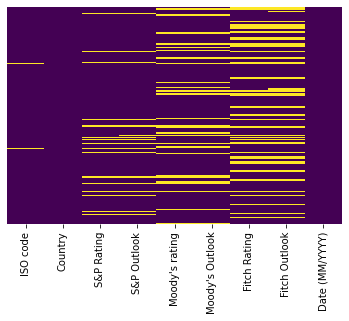

In [2]:
# -*- coding: utf-8 -*-
"""missingValueCode.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1_CcVHTm6z9ocpuKdhZWcnj8NuZRGuUQ7

needed "merged data - country rating.csv" file as "merged.csv"
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

rating = pd.read_csv('merged.csv')
# print()
rating.head()

sns.heatmap(rating.isnull(),yticklabels=False,cbar=False,cmap='viridis')

rating_demo=rating.copy()[["S&P Rating","S&P Outlook","Moody's rating","Moody's Outlook"]]
rating_demo

values={'AAA':21,
        'AA+':20,
        'AA':19,
        'AA-':18,
        'A+':17,
        'A':16,
        'A-':15,
        'BBB+':14,
        'BBB':13,
        'BBB-':12,
        'BB+':11,
        'BB':10,
        'BB-':9,
        'B+':8,
        'B':7,
        'B-':6,
        'CCC+':5,
        'CCC':4,
        'CCC-':3,
        'CC':2,
        'SD':1,
        'D':1,
        'STABLE':0,
        'STA':0,'POSITIVE':1,'NEGITIVE':-1,"NEG":-1,"WATCH NEGITIVE":-1,
        21:'AAA',
        20:'AA+',
        19:'AA',
        18:'AA-',17:'A+',16:'A',15:'A-',14:'BBB+',13:'BBB',12:'BBB-',
        11:'BB+',10:'BB',9:'BB-',8:'B+',7:'B',6:'B-',
        5:'CCC+',4:'CCC',3:'CCC-',2:'CC',1:'D'}

Charaterization_of_dept={
    'HIGHEST QUALITY':['AAA'],
    'HIGH QUALITY':['AA+','AA','AA-'],
    'STRONG PAYMENT CAPACITY':['A+','A-','A'],
    'ADEQUATE PAYMENT CAPACITY':['BBB+','BBB','BBB-'],
    'LIKELY TO FULFIL OBLIGATIONS':['BB+','BB','BB-'],
    'HIGH CREDIT RISK':['B+','B','B-'],
    'VERY HIGH CERDIT RISK':['CCC+','CCC','CCC-'],
    'NEAR DEFAULT WITH POSSIBILITY OF RECOVERY':['CC'],
    'DEFAULT':['SD','D'],
    21:'HIGHEST QUALITY',
        20:'HIGH QUALITY',
        19:'HIGH QUALITY',
        18:'HIGH QUALITY',
        17:'STRONG PAYMENT CAPACITY',16:'STRONG PAYMENT CAPACITY',
        15:'STRONG PAYMENT CAPACITY',14:'ADEQUATE PAYMENT CAPACITY',
        13:'ADEQUATE PAYMENT CAPACITY',12:'ADEQUATE PAYMENT CAPACITY',

        11:'LIKELY TO FULFIL OBLIGATIONS',10:'LIKELY TO FULFIL OBLIGATIONS',
        9:'LIKELY TO FULFIL OBLIGATIONS',8:'HIGH CREDIT RISK',
        7:'HIGH CREDIT RISK',6:'HIGH CREDIT RISK',
        5:'VERY HIGH CERDIT RISK',4:'VERY HIGH CERDIT RISK',
        3:'VERY HIGH CERDIT RISK',2:'NEAR DEFAULT WITH POSSIBILITY OF RECOVERY',
        1:'DEFAULT'
}

"""rating_demo.fillna(-1)
for Index,row in rating_demo.iterrows():
  if row["Moody's Outlook"] ==-1 or row["S&P Rating"]==-1 or row["S&P Outlook"]==-1 or row["Moody's rating"] ==-1:
    rating_demo.drop(index=Index,axis=0)
  else:
    row["Moody's Outlook"]=values[row["Moody's Outlook"]]
    row["S&P Rating"]=values[row["S&P Rating"]]
    row["S&P Outlook"]=values[row["S&P Outlook"]]
    row["Moody's rating"]=values[row["Moody's rating"]]

rating_demo.corr()
"""
"""rating_demo.dropna()
sns.pairplot(rating_demo,size=1.5)"""

"""rating_demo.fillna(-1)
rating_demo.corr()
plt.figure(figsize=(4,4))
sns.heatmap(rating_demo.corr())"""

#countries=set(rating['ISO code'])
#for i in county:
#  print(rating)
#for code in countries:
code='IN'  #EG,HK,MS
spRating=rating['S&P Rating']
df=rating.loc[rating['ISO code'] == code]
print(df)
df=df.fillna(-1)
index=df[df['ISO code'] == code].index.to_numpy()
try:
  heha=df['S&P Rating']
except:
  pass
stability=df['S&P Outlook']
map={'STABLE':0,
    'POSITIVE':0,
    'NEGATIVE':0}
map1={}
suma=0
count=0
for i in stability:
  if not pd.isna(i) and i!=-1:
    #map1[i]=map.get(i,0)+1
    if i in ['STA','STABLE']:
      map['STABLE']=map.get('STABLE',0)+1
    elif i in ['POS','POSITIVE']:
      map['POSITIVE']=map.get('POSTIVE',0)+1
    elif i in ['NEG','NEGITIVE','WATCH NEGATIVE']:
      map['NEGATIVE']=map.get('NEGATIVE',0)+1
    else:
      map[i]=map.get(i,0)+1
for i in heha:
  if not pd.isna(i) and i!=-1:
    map1[i]=map.get(i,0)+1
    suma+=values[i]
    count+=1
lst=sorted(map.items(),key=lambda x:[x[1]])
lst1=sorted(map1.items(),key=lambda x:[x[1]])
if count==0:
  pass
predicted_value=suma/count
floor_value=np.floor(predicted_value)
ceil_value=np.ceil(predicted_value)
df['S&P Outlook'] = df['S&P Outlook'].replace('NEG','NEGATIVE')
df['S&P Outlook'] = df['S&P Outlook'].replace('POS','POSITIVE')
df['S&P Outlook'] = df['S&P Outlook'].replace('STA','STABLE')
if floor_value==ceil_value:
  df['S&P Rating'] = df['S&P Rating'].replace(-1,values[floor_value])
  df['S&P Outlook'] = df['S&P Outlook'].replace(-1,lst[-1][0])
else:
  floor_rating,ceil_rating=values[floor_value],values[ceil_value]
  floor_chara=Charaterization_of_dept[floor_value]
  ceil_chara=Charaterization_of_dept[ceil_value]
  if floor_chara==ceil_chara:
    df['S&P Rating'] = df['S&P Rating'].replace(-1,lst1[-1][0])
    df['S&P Outlook'] = df['S&P Outlook'].replace(-1,lst[-1][0])
  else:
    stability_value=lst[0][0]
    if stability_value in ['STA','STABLE']:
      df['S&P Rating'] = df['S&P Rating'].replace(-1,lst1[-1][0])
      df['S&P Outlook'] = df['S&P Outlook'].replace(-1,lst[-1][0])
      #df['S&P Outlook'] = df['S&P Outlook'].replace('STA','STABLE')
    elif stability_value in ['POSITIVE','POS']:
      df['S&P Rating'] = df['S&P Rating'].replace(-1,ceil_rating)
      df['S&P Outlook'] = df['S&P Outlook'].replace(-1,'POSITIVE')
      #df['S&P Outlook'] = df['S&P Outlook'].replace('POS','POSITIVE')
    else:
      df['S&P Rating'] = df['S&P Rating'].replace(-1,floor_rating)
      df['S&P Outlook'] = df['S&P Outlook'].replace(-1,'NEGATIVE')
      #df['S&P Outlook'] = df['S&P Outlook'].replace('NEG','NEGATIVE')
print(df)

countries=set(rating['ISO code'])
#for i in county:
#  print(rating)
for code in countries:
  #code='MS'
  #spRating=rating['S&P Rating']
  #df=rating.loc[rating['ISO code'] == code]
  rating=rating.fillna(-1)
  index=rating[rating['ISO code'] == code].index.to_numpy()
  try:
    heha=rating[index[0]:index[-1]+1]['S&P Rating']
  except:
    continue
  stability=rating[index[0]:index[-1]+1]['S&P Outlook']
  map={'STABLE':0,
      'POSITIVE':0,
      'NEGATIVE':0}
  map1={}
  suma=0
  count=0
  for i in stability:
    if not pd.isna(i) and i!=-1:
      #map1[i]=map.get(i,0)+1
      if i in ['STA','STABLE']:
        map['STABLE']=map.get('STABLE',0)+1
      elif i in ['POS','POSITIVE']:
        map['POSITIVE']=map.get('POSTIVE',0)+1
      elif i in ['NEG','NEGITIVE','WATCH NEGATIVE']:
        map['NEGATIVE']=map.get('NEGATIVE',0)+1
      else:
        map[i]=map.get(i,0)+1
  for i in heha:
    if not pd.isna(i) and i!=-1:
      map1[i]=map.get(i,0)+1
      try:
        suma+=values[i]
        count+=1
      except:
        continue
  lst=sorted(map.items(),key=lambda x:[x[1]])
  lst1=sorted(map1.items(),key=lambda x:[x[1]])
  if count==0:
    continue
  predicted_value=suma/count
  floor_value=np.floor(predicted_value)
  ceil_value=np.ceil(predicted_value)
  rating['S&P Outlook'] = rating['S&P Outlook'].replace('NEG','NEGATIVE')
  rating['S&P Outlook'] = rating['S&P Outlook'].replace('POS','POSITIVE')
  rating['S&P Outlook'] = rating['S&P Outlook'].replace('STA','STABLE')
  if floor_value==ceil_value:
    rating[index[0]:index[-1]+1]['S&P Rating'] = rating[index[0]:index[-1]+1]['S&P Rating'].replace(-1,values[floor_value])
    rating[index[0]:index[-1]+1]['S&P Outlook'] = rating[index[0]:index[-1]+1]['S&P Outlook'].replace(-1,lst[-1][0])
  else:
    floor_rating,ceil_rating=values[floor_value],values[ceil_value]
    floor_chara=Charaterization_of_dept[floor_value]
    ceil_chara=Charaterization_of_dept[ceil_value]
    if floor_chara==ceil_chara:
      rating[index[0]:index[-1]+1]['S&P Rating'] = rating[index[0]:index[-1]+1]['S&P Rating'].replace(-1,lst1[-1][0])
      rating[index[0]:index[-1]+1]['S&P Outlook'] = rating[index[0]:index[-1]+1]['S&P Outlook'].replace(-1,lst[-1][0])
    else:
      stability_value=lst[0][0]
      if stability_value in ['STA','STABLE']:
        rating[index[0]:index[-1]+1]['S&P Rating'] = rating[index[0]:index[-1]+1]['S&P Rating'].replace(-1,lst1[-1][0])
        rating[index[0]:index[-1]+1]['S&P Outlook'] = rating[index[0]:index[-1]+1]['S&P Outlook'].replace(-1,lst[-1][0])
        #df['S&P Outlook'] = df['S&P Outlook'].replace('STA','STABLE')
      elif stability_value in ['POSITIVE','POS']:
        rating[index[0]:index[-1]+1]['S&P Rating'] = rating[index[0]:index[-1]+1]['S&P Rating'].replace(-1,ceil_rating)
        rating[index[0]:index[-1]+1]['S&P Outlook'] = rating[index[0]:index[-1]+1]['S&P Outlook'].replace(-1,'POSITIVE')
        #df['S&P Outlook'] = df['S&P Outlook'].replace('POS','POSITIVE')
      else:
        rating[index[0]:index[-1]+1]['S&P Rating'] = rating[index[0]:index[-1]+1]['S&P Rating'].replace(-1,floor_rating)
        rating[index[0]:index[-1]+1]['S&P Outlook'] = rating[index[0]:index[-1]+1]['S&P Outlook'].replace(-1,'NEGATIVE')
        #df['S&P Outlook'] = df['S&P Outlook'].replace('NEG','NEGATIVE')

rating.columns

new_columns=['ISO code', 'Country', 'S&P Rating', 'S&P Outlook', "Moody's rating",
       "Moody's Outlook", 'Fitch Rating', 'Fitch Outlook', 'Date (MM/YYYY)']
filname="filling_missing_values.csv"
with open(filname,'w') as csvfile:
  csvwriter = csv.writer(csvfile) 
  csvwriter.writerow(new_columns)

op = open("filling_missing_values.csv", "r")
dt = csv.DictReader(op)
up_dt = []
for index,row in rating.iterrows():
    up_dt.append({'ISO code':row['ISO code'], 'Country':row['Country'], 'S&P Rating':row['S&P Rating'],
                  'S&P Outlook':row['S&P Outlook'], 
                  "Moody's rating":row["Moody's rating"],
       "Moody's Outlook":row["Moody's Outlook"], 'Fitch Rating':row['Fitch Rating'],
        'Fitch Outlook':row['Fitch Outlook'], 'Date (MM/YYYY)':row['Date (MM/YYYY)']})
op.close()
op = open("filling_missing_values.csv", "w", newline='')
headers = ['ISO code', 'Country', 'S&P Rating', 'S&P Outlook', "Moody's rating",
       "Moody's Outlook", 'Fitch Rating', 'Fitch Outlook', 'Date (MM/YYYY)']
data = csv.DictWriter(op, delimiter=',', fieldnames=headers)
data.writerow(dict((heads, heads) for heads in headers))
data.writerows(up_dt)
  
op.close()



## 4. Web Scraping 

In [3]:
# Refrence
# https://towardsdatascience.com/scraping-table-data-from-websites-using-a-single-line-in-python-ba898d54e2bc

import pandas as pd
import numpy as np
import time 
start = time.time()

dflink = pd.read_excel('link.xlsx')

dflink

,ISOcode,Country,Link
0,ALB,Albania,https://tradingeconomics.com/albania/rating
1,AND,Andorra,https://tradingeconomics.com/andorra/rating
2,AGO,Angola,https://tradingeconomics.com/angola/rating
3,ARG,Argentina,https://tradingeconomics.com/argentina/rating
4,ARM,Armenia,https://tradingeconomics.com/armenia/rating
...,...,...,...
147,URY,Uruguay,https://tradingeconomics.com/uruguay/rating
148,UZB,Uzbekistan,https://tradingeconomics.com/uzbekistan/rating
149,VEN,Venezuela,https://tradingeconomics.com/venezuela/rating
150,VNM,Vietnam,https://tradingeconomics.com/vietnam/rating


In [4]:
a = "XX"
addrow1 = {
    'Agency' : [a],
    'Rating' : ['a'],
    'Outlook': ['b'],
    'Date' : ['c'],
    'Country' : ['d'],
    'ISOcode' : ['e']
    
}

df1 = pd.DataFrame(addrow1)

i = 0
while i <3: 
    URL = dflink.Link[i]
    pd.read_html(URL)

    tables = pd.read_html(URL)
    #print(tables[0])
    print(URL)
    #print(len(tables))
    dftemp = tables[0]
    #print(dftemp)
    
    array1 = np.repeat(dflink.Country[i], len(tables[0]))
    dftemp1 = dftemp.assign(Country = array1)
    #print(dftemp1)
     
    array2 = np.repeat(dflink.ISOcode[i], len(tables[0]))
    dftemp2 = dftemp1.assign(ISOcode = array2)
    #print(dftemp2)
    
    #print(dftemp1)

    df1 = df1.append(dftemp2)

    print(len(tables[0]), i)
    i = i +1


df1.drop(1)
df1.to_excel("fresh_data_after_web_scraping.xlsx")
end = time.time()
print(start)
print(end)
print(end-start)
df1

https://tradingeconomics.com/albania/rating
6 0
https://tradingeconomics.com/andorra/rating
18 1
https://tradingeconomics.com/angola/rating
37 2
1627575270.5241942
1627575303.6833122
33.15911793708801


,Agency,Rating,Outlook,Date,Country,ISOcode
0,XX,a,b,c,d,e
0,S&P,B+,Stable,Feb 05 2016,Albania,ALB
1,S&P,B,Positive,Oct 10 2014,Albania,ALB
2,S&P,B,Stable,Apr 11 2014,Albania,ALB
3,S&P,B,Negative,Dec 06 2013,Albania,ALB
...,...,...,...,...,...,...
32,Fitch,BB-,Stable,May 24 2011,Angola,AGO
33,Moody's,B1,Positive Watch,Apr 26 2011,Angola,AGO
34,S&P,B+,Stable,May 19 2010,Angola,AGO
35,Fitch,B+,Positive,May 19 2010,Angola,AGO


## 6. Data Visualization

### a. Geographical Heat Plot

In [22]:
import plotly.express as px
import plotly.express as p
import pandas as pd

df1 = pd.read_excel("geo_heat_plot.xlsx")
# df1 = pd.read_excel("geo_heat_plot.xlsx", sheet_name = "my_sheet")

df1.head()

i = 1
while i<12: #increase i for number of graphs required
    if i == 1:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 04/2010", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 2:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 09/2011", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 3:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 12/2011", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 4:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 01/2012", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 5:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 02/2012", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 6:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 03/2012", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 7:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 06/2012", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 8:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 07/2012", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 9:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 10/2012", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 10:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 01/2013", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 11:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 03/2013", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
 
    i = i+1
    fig.show()
    



### b. Stock X-Y Plot

In [6]:
import pandas  as pd

df = pd.read_excel("xy_plot.xlsx")
# df = pd.read_excel("xy_plot.xlsx", sheet_name="name")
df.head()

import plotly.graph_objects as go
import numpy as np

x = df.Date
y = df.Rating
fig = go.Figure()
title = 'Main Source for News'

fig.add_trace(go.Scatter(x=x, y=y, name="India", line_shape='hvh'))



fig.update_traces(hoverinfo='text+name', mode='lines+markers')
fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16,))

fig.show()



df

,Date,Rating
0,1990-09-13,14
1,1991-03-07,13
2,1991-05-29,12
3,1991-09-29,12
4,1996-10-01,12
5,1997-10-06,12
6,1998-05-22,12
7,1998-10-22,11
8,2000-03-20,11
9,2000-10-10,11


# 7. Model Building 


# Bayes Classification

131
{'ALB': [0, 1, 2, 3, 4], 'AND': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'AGO': [20, 21, 22, 23, 24, 25, 26, 27, 28], 'ARG': [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64], 'ABW': [65, 66, 67, 68, 69, 70, 71, 72, 73, 74], 'AUS': [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87], 'AUT': [88, 89, 90, 91, 92], 'AZE': [93, 94, 95, 96, 97, 98, 99, 100, 101], 'BHS': [102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114], 'BHR': [115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130], 'BGD': [131], 'BRB': [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150], 'BLR': [151, 152, 153, 154, 155, 156, 157, 158, 159, 160], 'BEL': [161, 162, 163, 164, 165, 166, 167, 168], 'BLZ': [169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 1

108
371
371
{'ALB': {'original_values': [8, 4], 'predicted_values': array([5, 5])}, 'AND': {'original_values': [8, 4], 'predicted_values': array([5, 5])}, 'AGO': {'original_values': [8, 4], 'predicted_values': array([5, 5])}, 'ARG': {'original_values': [8, 4], 'predicted_values': array([5, 5])}, 'ABW': {'original_values': [8, 4], 'predicted_values': array([5, 5])}, 'AUS': {'original_values': [8, 4], 'predicted_values': array([5, 5])}, 'AUT': {'original_values': [8, 4], 'predicted_values': array([5, 5])}, 'AZE': {'original_values': [8, 4], 'predicted_values': array([5, 5])}, 'BHS': {'original_values': [8, 4], 'predicted_values': array([5, 5])}, 'BHR': {'original_values': [8, 4], 'predicted_values': array([5, 5])}, 'BGD': {'original_values': [8, 4], 'predicted_values': array([5, 5])}, 'BRB': {'original_values': [8, 4], 'predicted_values': array([5, 5])}, 'BLR': {'original_values': [8, 4], 'predicted_values': array([5, 5])}, 'BEL': {'original_values': [8, 4], 'predicted_values': array([5,

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:452: RuntimeWarning:

divide by zero encountered in log

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning:

divide by zero encountered in true_divide

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning:

invalid value encountered in true_divide

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:452: RuntimeWarning:

divide by zero encountered in log

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning:

divide by zero encountered in true_divide

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning:

invalid value encountered in true_divide



NameError: name 'cap' is not defined

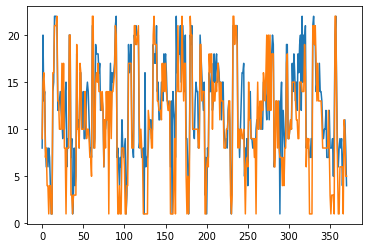

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix





my_sheet = 'S&P rating' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'fresh-data-1.xlsx' # change it to the name of your excel file
df = pd.read_excel(file_name, sheet_name = my_sheet)
df.head()






df.drop(["Country","Agency","Date_of_Rating","No_of_Months","Start_Date"],axis='columns',inplace=True)
#droping all unnecessary attributes
df.head()




iso_code=df["ISOcode"].unique() #different iso_code
print(len(iso_code))
dit=dict.fromkeys(iso_code,[])
for index,row in df.iterrows():
  dit[row["ISOcode"]]=dit.get(row["ISOcode"],0)+[index]
print(dit) # map with country as key and list of indices from dataset as values





dummies = pd.get_dummies(df.Outlook)
su = dummies.rename(columns={dummies.columns[1]: 'new',dummies.columns[3]: 'new1'})
su.drop(["new","new1"],axis='columns',inplace=True)
su.head()




df = pd.concat([df,su],axis='columns') # changing outlook attribute ategorical value to binary values with new attribute NEgative, Positive and stable
df.head(3)



df.drop(['Outlook',"Rating"],axis='columns',inplace=True)
df = df.rename(columns={df.columns[1]: 'Rating'})
df.head(3)




df.Rating = df.Rating.fillna(10)
target=df["Rating"]
df.drop(["Rating",],axis='columns',inplace=True)
df2=df.copy()
df2.drop(["ISOcode"],axis='columns',inplace=True)
df2.head()



count=0
#iso_code=["AND"]
original_values=[]
predicted_values=[]
map=dict.fromkeys(iso_code,{"original_values":[],"predicted_values":[]})
for key,value in dit.items():
  if len(value)>4:
   count+=1
   #print(key)
   temp_df=df2[value[1]:value[-1]+1]
   #print(temp_df)
   temp_df=temp_df.astype('int')
   temp_target=target[value[1]:value[-1]+1]
   #print(temp_target)
   try:
     temp_target.replace({"SD":1}, inplace=True)
   except:
     pass
   temp_target=temp_target.astype('int')
   X_train, X_test, y_train, y_test = train_test_split(temp_df,temp_target,test_size=0.2)
   model = GaussianNB()
   model.fit(X_train,y_train)
   model.score(X_test,y_test)
   predicted_value=model.predict(X_test[:10])
   predicted_values+=predicted_value.tolist()
   #print(value)
   original_value=y_test.tolist()
   original_values+=original_value
   #print(original_value)
   map[key]["original_values"]=original_value
   map[key]["predicted_values"]=predicted_value
print(count)
print(len(predicted_values))
print(len(original_values))
print(map)




x_points=[i for i in range(len(original_values))]
plt.plot(x_points,original_values,
         x_points,predicted_values)




print("Accuracy score:",accuracy_score(original_values,predicted_values,))
print(confusion_matrix(original_values,predicted_values,))



# Time Series Forcasting Model

### Diffrent Types of time series model

1. Autoregression Models (AR Models) 
2. Moving averages Models (MA Models)
3. Autoregressive Moving Averages (ARMA Models)
4. Autoregressive Integrated Moving Averages (ARIMA Models)

### What is time series and why to use?

- A time series is a set of observations taken at a specified time interval


### Checking Stationarity
- Constant Mean 
- Constant Variance 
- No Seasonality

   If any time series data set satisfy above mentioned pionts then it is stationart and time series model can be used on it

### Time Series Analysis can be used in:

- Economic Forecasting
- Sales Forecasting
- Budgetary Analysis
- Stock Market Analysis
- Yield Projections
- Inventory assessments
- Workload projections
- Demographics projections
- Weather patterns and forecasts




# AR Model

### AutoRegression Model
AR Model of order 1
$$  
         \Upsilon_{t} = \beta_{0}+ \beta_{1}*\Upsilon _{t-1}
$$

AR Model of order 2

$$
        \Upsilon_{t} = \beta_{0}+ \beta_{1}*\Upsilon _{t-1} + \beta_{2}*\Upsilon _{t-2}
$$
AR Model of order p

$$
        \Upsilon_{t} = \beta_{0}+ \beta_{1}*\Upsilon _{t-1} + \beta_{2}*\Upsilon _{t-2}  . . . . + \beta_{p}*\Upsilon _{t-p}
$$


- <B>Stationarity of the time-series data</B>: The stationarity of the data can be found using adfuller class of statsmodels.tsa.stattools module. The value of p-value is used to determine whether there is stationarity. If the value is less than 0.05, the stationarity exists.
- <B>Order of AR model to be trained</B>: The order of AR model is determined by checking the partial autocorrelation plot. The plot_pacf method of statsmodels.graphics.tsaplots is used to plot.

In [1]:
import pandas  as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import confusion_matrix


my_sheet = 'S&P rating' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'fresh-data-1.xlsx' # change it to the name of your excel file
df = pd.read_excel("fresh-data-1.xlsx", sheet_name = "S&P rating")
df


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
iso_code=df["ISOcode"].unique() #different iso_code
# print(len(iso_code))
dit=dict.fromkeys(iso_code,[]) 
# print(dit)
for index,row in df.iterrows():
    dit[row["ISOcode"]]=dit.get(row["ISOcode"],0)+[index]
    print(dit) #indices for particalr country


---------##########################----------
Number of data points of Albania are 5
---------##########################----------
Number of data points of Andorra are 15
[[19]
 [20]
 [20]
 [19]
 [18]
 [17]
 [16]
 [15]
 [14]
 [13]
 [13]
 [13]
 [14]
 [14]
 [14]]
Predicted S&P rating of Andorra in next month is [14.]
---------##########################----------
Number of data points of Angola are 9
[[ 9]
 [10]
 [ 9]
 [ 9]
 [ 8]
 [ 8]
 [ 7]
 [ 7]
 [ 6]]
Predicted S&P rating of Angola in next month is [7.]
---------##########################----------
Number of data points of Argentina are 36
[[11]
 [10]
 [10]
 [ 9]
 [ 8]
 [ 8]
 [ 7]
 [ 6]
 [ 3]
 [ 1]
 [ 7]
 [ 8]
 [ 9]
 [ 9]
 [ 8]
 [ 7]
 [ 8]
 [ 8]
 [ 7]
 [ 6]
 [ 4]
 [ 4]
 [ 1]
 [ 7]
 [ 8]
 [ 9]
 [ 9]
 [ 8]
 [ 7]
 [ 1]
 [ 4]
 [ 1]
 [ 3]
 [ 4]
 [ 1]
 [ 6]]
Predicted S&P rating of Argentina in next month is [3.]
---------##########################----------
Number of data points of Aruba are 10
[[16]
 [16]
 [16]
 [15]
 [15]
 [15]
 [15]
 [15

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:53: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.




Number of data points of Guatemala are 12
[[11]
 [11]
 [10]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [10]
 [10]
 [10]]
Predicted S&P rating of Guatemala in next month is [11.]
---------##########################----------
Number of data points of Honduras are 10
[[ 9]
 [ 9]
 [ 8]
 [ 8]
 [ 9]
 [ 9]
 [ 8]
 [ 9]
 [ 9]
 [10]]
Predicted S&P rating of Honduras in next month is [9.]
---------##########################----------
Number of data points of Hong Kong are 22
[[18]
 [18]
 [17]
 [17]
 [17]
 [17]
 [17]
 [17]
 [18]
 [18]
 [17]
 [17]
 [18]
 [18]
 [19]
 [19]
 [20]
 [20]
 [21]
 [22]
 [22]
 [21]]
Predicted S&P rating of Hong Kong in next month is [23.]
---------##########################----------
Number of data points of Hungary are 29
[[12]
 [12]
 [12]
 [12]
 [13]
 [13]
 [14]
 [15]
 [16]
 [16]
 [15]
 [15]
 [15]
 [15]
 [14]
 [13]
 [13]
 [13]
 [13]
 [12]
 [11]
 [11]
 [11]
 [12]
 [13]
 [13]
 [14]
 [14]
 [14]]
Predicted S&P rating of Hungary in next month is [14.]
---------#####################

Predicted S&P rating of Romania in next month is [13.]
---------##########################----------
Number of data points of Russia are 31
[[10]
 [10]
 [10]
 [ 9]
 [ 7]
 [ 5]
 [ 4]
 [ 1]
 [ 7]
 [ 8]
 [ 9]
 [ 9]
 [ 9]
 [10]
 [11]
 [12]
 [14]
 [13]
 [15]
 [15]
 [15]
 [15]
 [14]
 [14]
 [14]
 [13]
 [13]
 [12]
 [12]
 [12]
 [13]]
Predicted S&P rating of Russia in next month is [12.]
---------##########################----------
Number of data points of Rwanda are 9
[[8]
 [8]
 [8]
 [9]
 [9]
 [8]
 [8]
 [9]
 [9]]
Predicted S&P rating of Rwanda in next month is [9.]
---------##########################----------
Number of data points of Saudi Arabia are 9
[[17]
 [17]
 [18]
 [19]
 [19]
 [19]
 [19]
 [18]
 [16]]
Predicted S&P rating of Saudi Arabia in next month is [18.]
---------##########################----------
Number of data points of Senegal are 7
---------##########################----------
Number of data points of Serbia are 16
[[ 9]
 [10]
 [10]
 [10]
 [10]
 [10]
 [11]
 [10]
 [10]
 [10]
 

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



NameError: name 'cap' is not defined

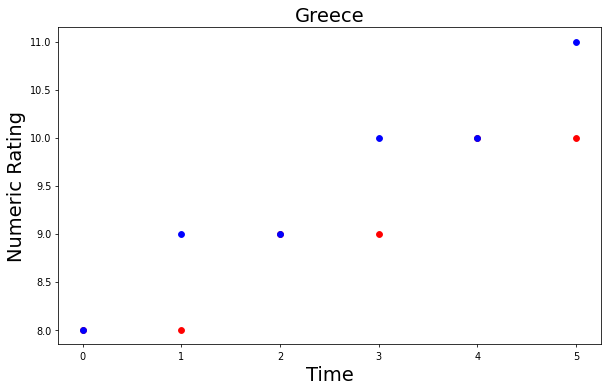

In [17]:
i = 0
for key,value in dit.items():
    try:
        temp_target.replace({"SD":1}, inplace=True)
    except:
        pass
    temp_df=df[value[0]:value[-1]+1]
    #print(key)
#     print(temp_df)
    print("---------##########################----------")
    
    

    count_row = temp_df.shape[0]
    i = count_row +i
#     print(i)
    
    pcountry = temp_df.Country[i - 1]
    pISOcode = temp_df.ISOcode[i - 1]
    print("Number of data points of", pcountry, "are", count_row)
    if count_row > 7:
        date_temp = temp_df.Date_of_Rating
        rating_temp = temp_df.Numeric_Rating    
    
        rating = rating_temp.values
#         print(rating)
        rating = rating.reshape((count_row, 1))
        print(rating)

#         dftest = adfuller(temp_df["Numeric_Rating"], autolag = "AIC")
    
        train = rating[:len(rating)-1]
        model = AutoReg(train,lags=2).fit()
        pred = model.predict(start=len(train), end=len(rating)-1, dynamic=False)
        pred1 = np.ceil(pred)

        print("Predicted S&P rating of",pcountry, "in next month is" , pred1)

            
    if pISOcode == "GRC":
        train = rating[:len(rating)-6]
        test = rating[len(rating)-6:]
        # print(train)
        print(train)
        model1 = AutoReg(train,lags=3).fit()
        print(model.summary())

        pred_s = model.predict(start=len(train), end=len(rating)-1, dynamic=False)
        pred1_s = np.ceil(pred_s)
        pyplot.figure(figsize=(10, 6), dpi=70)
        
        pyplot.plot(pred1_s, "ro")
        pyplot.plot(test, "ro" ,color = 'blue', )
        
        
        pyplot.xlabel('Time', fontsize=20)
        pyplot.ylabel('Numeric Rating', fontsize=20)
        pyplot.title(pcountry, fontsize=20)
        print(pred1_s)
#         print("Hello Greece")
    
    
print("  ")
print("  ")
print("  ")
print("  ")
print("Actual points - Blue")
print("Predicted points - Red")

with open('output.txt', 'w') as f:
    f.write(cap.stdout)



Confusion Matrix of Greece
[[1 0 0 0]
 [1 1 0 0]
 [0 1 1 0]
 [0 0 1 0]]


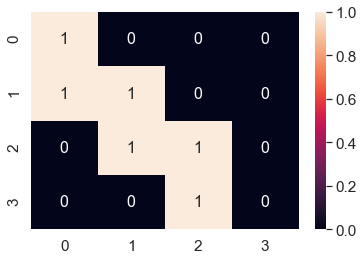

Confusion Matrix of Greece


In [20]:
print("Confusion Matrix of Greece")
print(confusion_matrix(test,pred1_s,))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[1, 0, 0, 0], [1, 1, 0, 0],[0, 1, 1, 0],[0, 0, 1, 0]]

df_cm = pd.DataFrame(array, range(4), range(4))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
print("Confusion Matrix of Greece")